In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Stellar classification
## Context
_In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics._

Kaggle link: [https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17)


## Load data

In [241]:
data = pd.read_csv("data/stars/star_classification.csv")

## Data exploration
Let's explore the data to see what we have. We will look at the data types, missing values, and the distribution of the target variable.

In [242]:
def pie_ratio(df, col):
    df[col].value_counts().plot.pie(autopct="%1.1f%%")
    plt.title(col)
    plt.show()

In [243]:
data.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

There are 18 columns, 17 features and 1 target variable (class). The target variable is categorical, the rest are numerical.

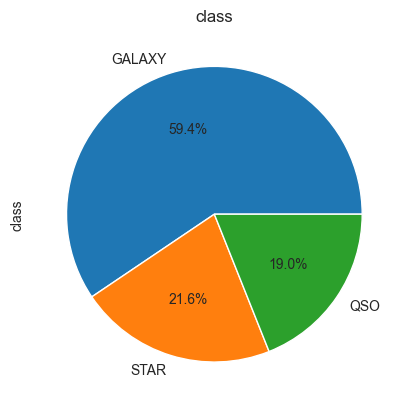

In [245]:
pie_ratio(data, "class")

Data is unbalanced, there are more galaxies than stars and quasars. Let's change the target variable to numerical for easier analysis.

## Feature selection

Available features:
* obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
* alpha = Right Ascension angle (at J2000 epoch)
* delta = Declination angle (at J2000 epoch)
* u = Ultraviolet filter in the photometric system
* g = Green filter in the photometric system
* r = Red filter in the photometric system
* i = Near Infrared filter in the photometric system
* z = Infrared filter in the photometric system
* run_ID = Run Number used to identify the specific scan
* rereun_ID = Rerun Number to specify how the image was processed
* cam_col = Camera column to identify the scanline within the run
* field_ID = Field number to identify each field
* spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
* class = object class (galaxy, star or quasar object)
* redshift = redshift value based on the increase in wavelength
* plate = plate ID, identifies each plate in SDSS
* MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
* fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

In [246]:
def plot(column, df, log=False):
    for i in df["class"].unique():
        if log:
            sns.kdeplot(
                data=np.log(df[df["class"] == i][column]),
                label=i,
                warn_singular=False
            )
        else:
            sns.kdeplot(
                data=df[df["class"] == i][column],
                label=i,
                warn_singular=False
            )
    plt.legend()

Drop columns that are not useful for classification.

In [247]:
data.drop(["obj_ID", "run_ID"], axis=1, inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


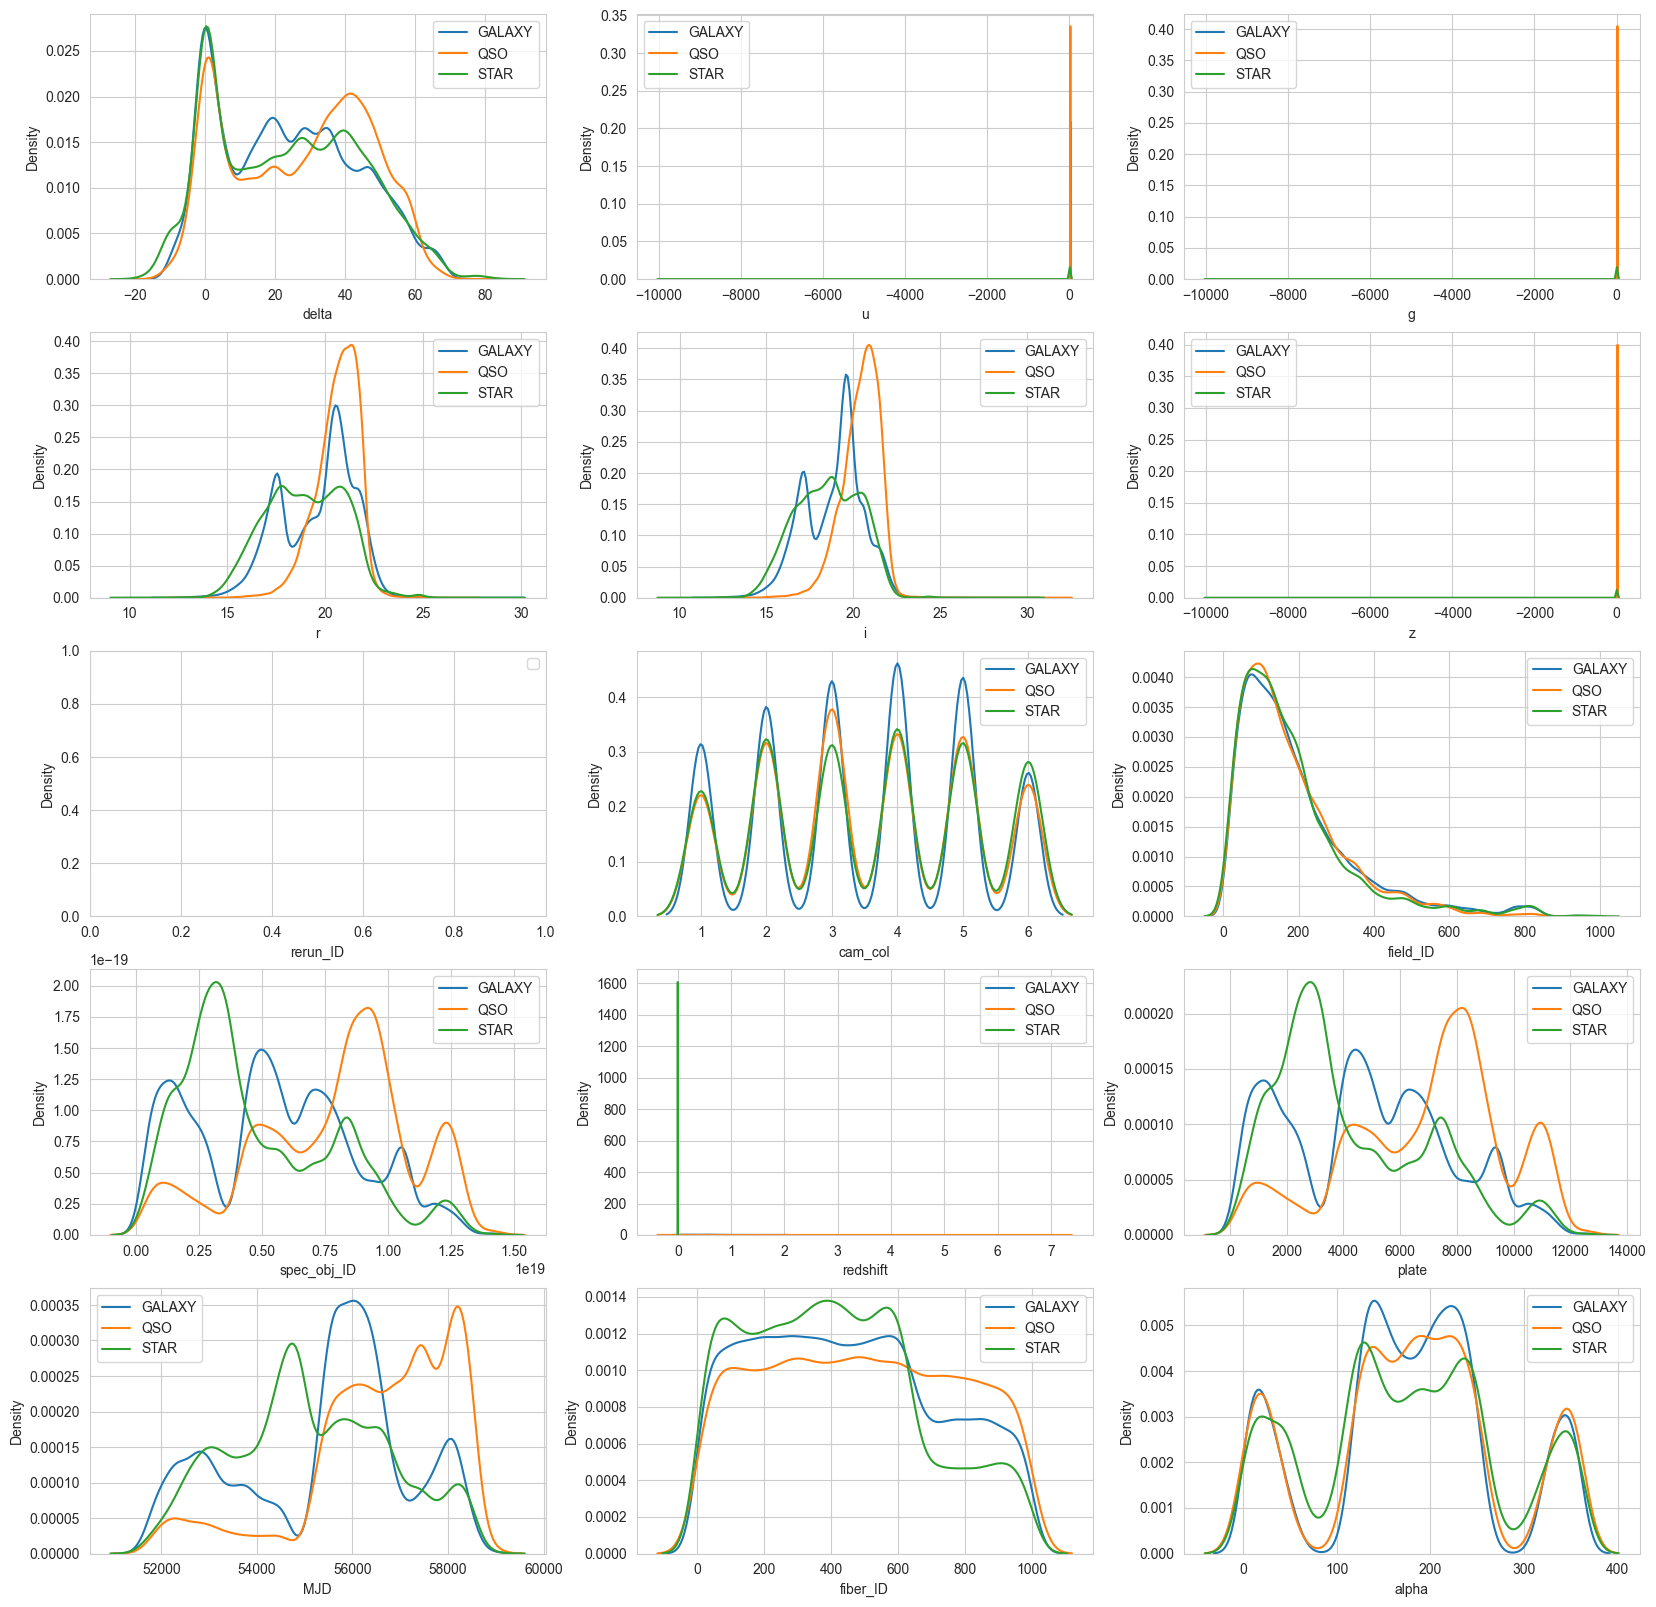

In [248]:
ax, fig = plt.subplots(5, 3, figsize=(20, 20))
for i, column in enumerate(data.drop(["class"], axis=1).columns):
    plot(column, data)
    plt.subplot(5, 3, i + 1)

There is no significant difference in the distribution for cam_col, field_ID, rerun_ID features. Let's drop them.

In [249]:
data.drop(["cam_col", "field_ID", "rerun_ID"], axis=1, inplace=True)

Some features have a very high skewness, so plot them with log scale. In preprocessing we will apply log transformation to these features.

P:\Python venvs\ML\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
P:\Python venvs\ML\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
P:\Python venvs\ML\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
P:\Python venvs\ML\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
P:\Python venvs\ML\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
P:\Python venvs\ML\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inp

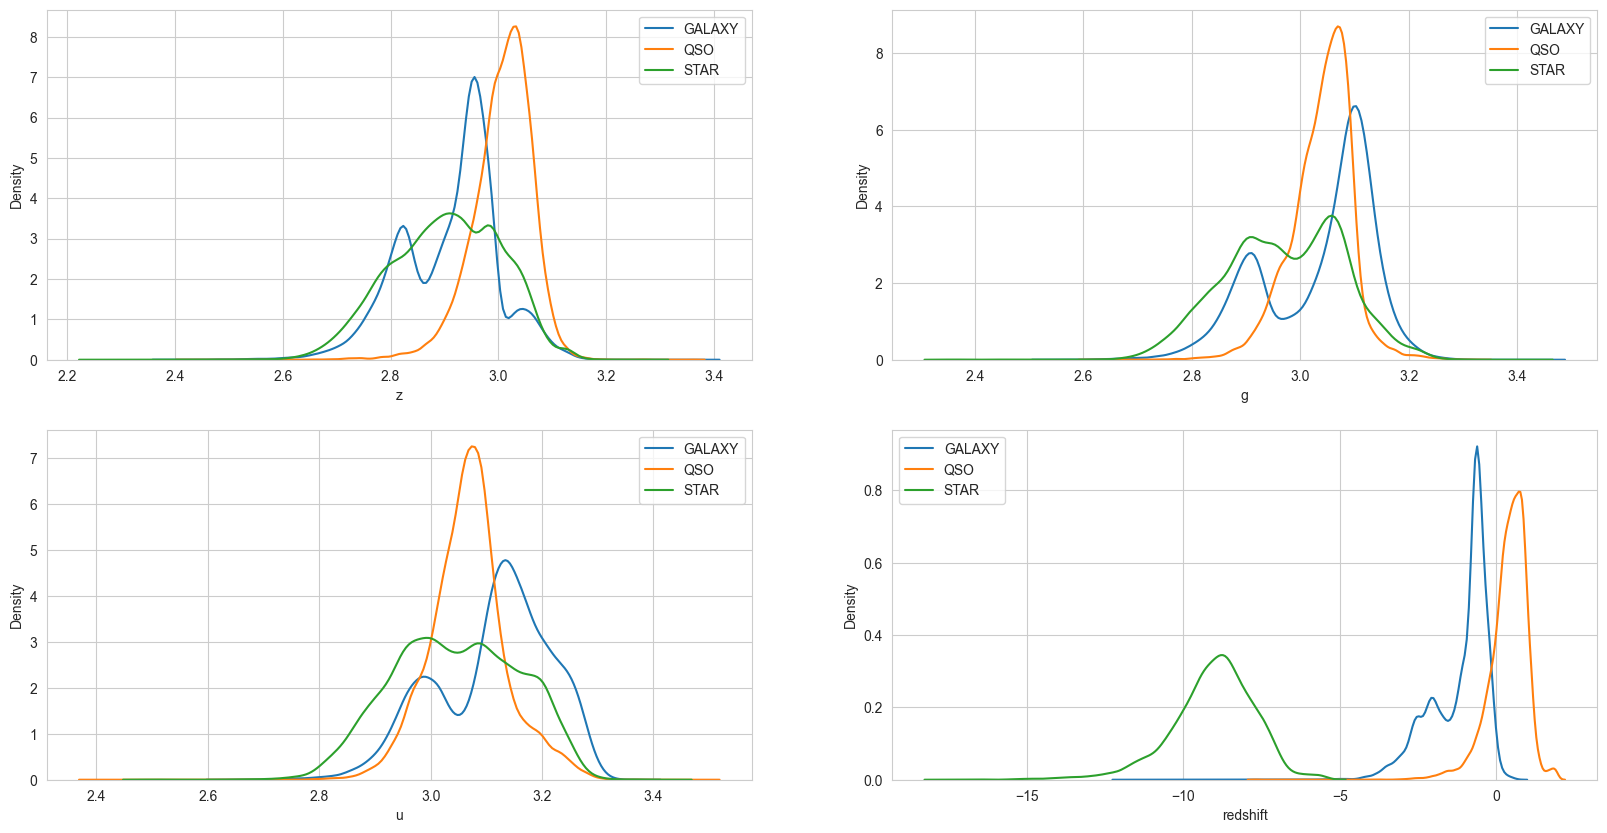

In [250]:
ax, fig = plt.subplots(2, 2, figsize=(20, 10))
for i, column in enumerate(["redshift", "z", "g", "u"]):
    plot(column, data, log=True)
    plt.subplot(2, 2, i + 1)

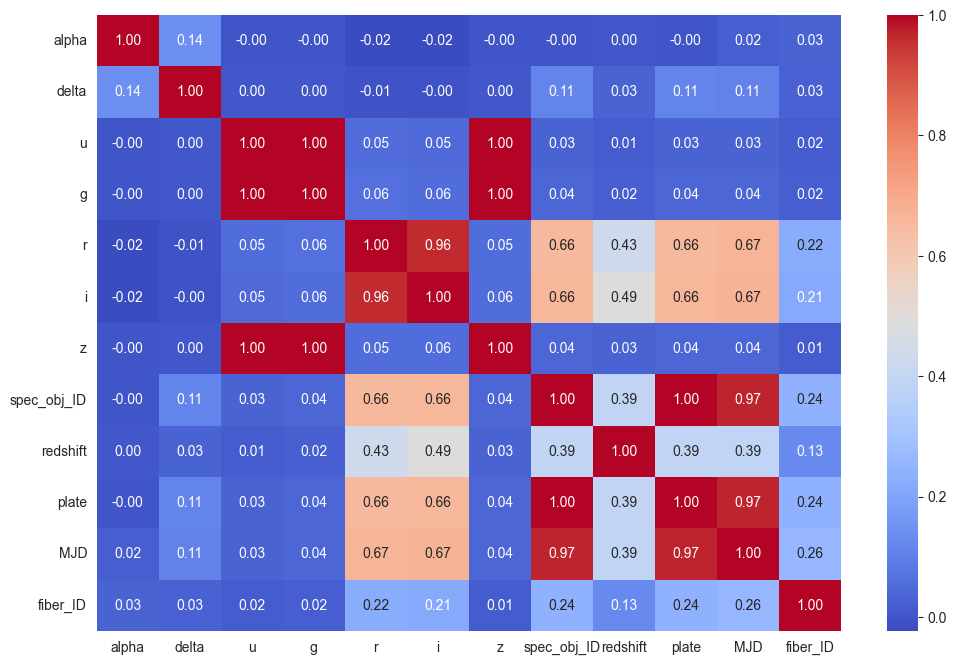

In [251]:
corr = data.drop(["class"], axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

## Preprocessing pipeline
* Fill missing values using KNN
* Log transformation for skewed features
* Standardization
* Encode target variable

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer

In [ ]:
features = data.drop(["class"], axis=1).columns
skewed_features = ["redshift", "z", "g", "u"]

preprocessing_pipeline = ColumnTransformer([
    ("imputer", KNNImputer(n_neighbors=5), features),
    ("log", FunctionTransformer(np.log1p, validate=True), skewed_features),
    ("scaler", StandardScaler(), features),
    ("encoder", LabelEncoder(), ["class"])
])

## Train standard models
* Logistic Regression
* Random Forest
* K-Nearest Neighbors (KNN)
* Support Vector Machine (SVM)
* XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
X = data.drop(["class"], axis=1)
y = data["class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)